In [1]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
%matplotlib inline
import seaborn as sns
import sqlite3




In [2]:
sns.set()

In [3]:
data=pd.read_csv("C:/Users/keerthana/BlackFriday.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


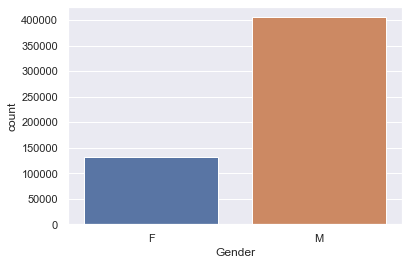

In [7]:
sns.countplot(data['Gender'])

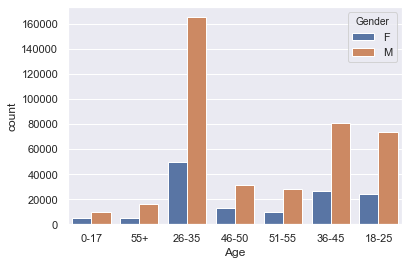

In [8]:
sns.countplot(data['Age'], hue=data['Gender'])

In [9]:
data.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [10]:
def unique(column):
    x = np.array(column)
    print(np.unique(x))

In [11]:
print("The unique ID numbers of customers occupations:")
unique(data['Occupation'])

The unique ID numbers of customers occupations:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [12]:
occupations_id = list(range(0, 21))
spent_money = []
for oid in occupations_id:
    spent_money.append(data[data['Occupation'] == oid]['Purchase'].sum())

spent_money

[625814811,
 414552829,
 233275393,
 160428450,
 657530393,
 112525355,
 185065697,
 549282744,
 14594599,
 53619309,
 114273954,
 105437359,
 300672105,
 71135744,
 255594745,
 116540026,
 234442330,
 387240355,
 60249706,
 73115489,
 292276985]

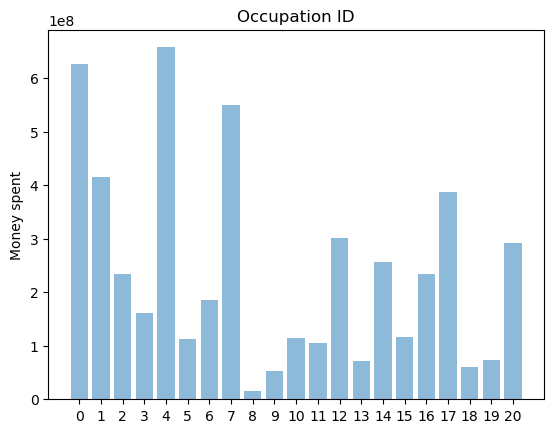

In [13]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

objects = ('0', '1', '2', '3', '4', '5','6','7','8','9','10', '11','12', '13', '14', '15', '16', '17', '18', '19', '20')
y_pos = np.arange(len(objects))

plt.bar(y_pos, spent_money, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Money spent')
plt.title('Occupation ID')

plt.show()


In [9]:
data = data.drop(['Product_Category_3'], axis=1)

In [10]:
data['Product_Category_2'].fillna((data['Product_Category_2'].mean()), inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 11 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 45.1+ MB


In [12]:
data = data.drop(['User_ID','Product_ID'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 9 columns):
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 36.9+ MB


In [13]:
df_Gender = pd.get_dummies(data['Gender'])
df_Age = pd.get_dummies(data['Age'])
df_City_Category = pd.get_dummies(data['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(data['Stay_In_Current_City_Years'])

data_final = pd.concat([data, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,...,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,9.842144,8370,1,...,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,6.000000,15200,1,...,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,9.842144,1422,1,...,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,14.000000,1057,1,...,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,9.842144,7969,0,...,0,1,0,0,1,0,0,0,0,1


In [14]:
X = data_final[['Occupation', 'Marital_Status', 'Product_Category_2']]
y = data_final['Purchase']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression()
y=lm.fit(X_train, y_train)

In [18]:
from tkinter import *
from tkinter import messagebox as ms
import sqlite3


In [19]:
with sqlite3.connect('quit.db') as db:
    c = db.cursor()
c.execute('CREATE TABLE IF NOT EXISTS user (username TEXT NOT NULL ,password TEX NOT NULL);')


In [21]:
class main:
    global p
    def __init__(self, master):
        # Window
        self.master = master
        # Some Usefull variables
        self.username = StringVar()
        self.password = StringVar()
        self.n_username = StringVar()
        self.n_password = StringVar()
        self.Occupation = IntVar()
        self.Marital_Status = IntVar()
        self.Product_Category_2 = IntVar()
        # Create Widgets
        self.widgets()
# Login Function
    def login(self):
        # Establish Connection
        with sqlite3.connect('quit.db') as db:
            c = db.cursor()

        # Find user If there is any take proper action
        find_user = ('SELECT * FROM user WHERE username = ? and password = ?')
        c.execute(find_user, [(self.username.get()), (self.password.get())])
        result = c.fetchall()
        if result:
            self.logf.pack_forget()
            # self.head['text'] = self.username.get() + '\n Loged In'
            self.head = Label(self.master, text='Details', font=('', 35), pady=10)
            self.head.pack()
            self.detf = Frame(self.master, padx=10, pady=10)
            Label(self.detf, text='Occupation: ', font=('', 20), pady=5, padx=5).grid(sticky=W)
            Entry(self.detf, textvariable=self.Occupation, bd=5, font=('', 15)).grid(row=0, column=1)
            Label(self.detf, text='Marital_Status: ', font=('', 20), pady=5, padx=5).grid(sticky=W)
            Entry(self.detf, textvariable=self.Marital_Status, bd=5, font=('', 15)).grid(row=1, column=1)
            Label(self.detf, text='Product_Category_2: ', font=('', 20), pady=5, padx=5).grid(sticky=W)
            Entry(self.detf, textvariable=self.Product_Category_2, bd=5, font=('', 15)).grid(row=2, column=1)
            Button(self.detf, text=' Submit ', bd=3, font=('', 15), padx=5, pady=5, command=self.algo).grid()
            # Button(self.detf,text = ' Create Account ',bd = 3 ,font = ('',15),padx=5,pady=5,command=self.cr).grid(row=2,column=1)
            self.detf.pack()
        else:
            ms.showerror('Oops!', 'Username Not Found.')
    def new_user(self):
        # Establish Connection
        with sqlite3.connect('quit.db') as db:
            c = db.cursor()
        # Find Existing username if any take proper action
        find_user = ('SELECT * FROM user WHERE username = ?')
        c.execute(find_user, [(self.username.get())])
        if c.fetchall():
            ms.showerror('Error!', 'Username Taken Try a Diffrent One.')
        else:
            ms.showinfo('Success!', 'Account Created!')
            self.log()
        # Create New Account
        insert = 'INSERT INTO user(username,password) VALUES(?,?)'
        c.execute(insert, [(self.n_username.get()), (self.n_password.get())])
        db.commit()
        # Frame Packing Methords
    def log(self):
        self.username.set('')
        self.password.set('')
        self.crf.pack_forget()
        self.head['text'] = 'LOGIN'
        self.logf.pack()
    def cr(self):
        self.n_username.set('')
        self.n_password.set('')
        self.logf.pack_forget()
        self.head['text'] = 'Create Account'
        self.crf.pack()
    def algo(self):
        a = self.Occupation.get()
        b = self.Marital_Status.get() 
        d = self.Product_Category_2.get()
        c = y.predict([[a, b, d]])
        self.detf.pack_forget()
        #self.head['text'] = 'Result'
        #self.result.pack()
        Label(self.head, text='Purchase : ', font=('', 20), pady=5, padx=5).grid(row=6,column=2)
        Label(self.head, text=c, font=('', 20), pady=5, padx=5).grid(row=6,column=5)
        self.head.pack()
    # Draw Widgets
    def widgets(self):
        self.head = Label(self.master, text='WELCOME', font=('', 35), pady=10)
        self.head.pack()
        self.logf = Frame(self.master, padx=10, pady=10)
        self.head = Label(self.logf, text='Login', font=('', 35), pady=10)
        Label(self.logf, text='Username: ', font=('', 20), pady=5, padx=5).grid(sticky=W)
        Entry(self.logf, textvariable=self.username, bd=5, font=('', 15)).grid(row=0, column=1)
        Label(self.logf, text='Password: ', font=('', 20), pady=5, padx=5).grid(sticky=W)
        Entry(self.logf, textvariable=self.password, bd=5, font=('', 15), show='*').grid(row=1, column=1)
        Button(self.logf, text=' Login ', bd=3, font=('', 15), padx=5, pady=5, command=self.login).grid()
        Button(self.logf, text=' Create Account ', bd=3, font=('', 15), padx=5, pady=5, command=self.cr).grid(row=2,column=1)
        self.logf.pack()
        self.crf = Frame(self.master, padx=10, pady=10)
        Label(self.crf, text='Username: ', font=('', 20), pady=5, padx=5).grid(sticky=W)
        Entry(self.crf, textvariable=self.n_username, bd=5, font=('', 15)).grid(row=0, column=1)
        Label(self.crf, text='Password: ', font=('', 20), pady=5, padx=5).grid(sticky=W)
        Entry(self.crf, textvariable=self.n_password, bd=5, font=('', 15), show='*').grid(row=1, column=1)
        Button(self.crf, text='Create Account', bd=3, font=('', 15), padx=5, pady=5, command=self.new_user).grid()
        Button(self.crf, text='Go to Login', bd=3, font=('', 15), padx=5, pady=5, command=self.log).grid(row=2,column=1)

        #self.result = Frame(self.master, padx=10, pady=10)
        #Label(self.result, text=p, font=('',20), pady=5, padx=5).grid(sticky=W)
        #self.result.pack()


# create window and application object
root = Tk()
# root.title("Login Form")
main(root)
root.mainloop()
